In [1]:
using DelimitedFiles
BC=zeros(17,4,2)
a=["050","059","069","078","088","097","101","116","125","144","168","192","239","286","333","380","427"]
b=["wild","rap1","sir1"]
concs=[0.05,0.059,0.069,0.078,0.088,0.097,0.101,0.116,0.125,0.144,0.168,0.192,0.239,0.286,0.333,0.380,0.427]
j=0
for str in b
    j=j+1
    k=0
for char in a
    k=k+1
    sample=readdlm("profiles_f_"*str*"_sir4t_"*char*".dat")
    firstm=0.0
    secondm=0.0
    thirdm=0.0
    fourthm=0.0
    norm=sum(sample[:,2])
    for i in 1:size(sample)[1]
        firstm=firstm+(i-1)*sample[i,2]/norm
    end
    for i in 1:size(sample)[1]
        secondm=secondm+((i-1)-firstm)^2*sample[i,2]/norm
        thirdm=thirdm+((i-1)-firstm)^3*sample[i,2]/norm
        fourthm=fourthm+((i-1)-firstm)^4*sample[i,2]/norm
    end
    skewness=thirdm/secondm^(3/2.0)
    exckurt=fourthm/secondm^2
    BC[k,j,1]=concs[k]
    BC[k,j,2]=(skewness^2+1)/(exckurt)
end
end

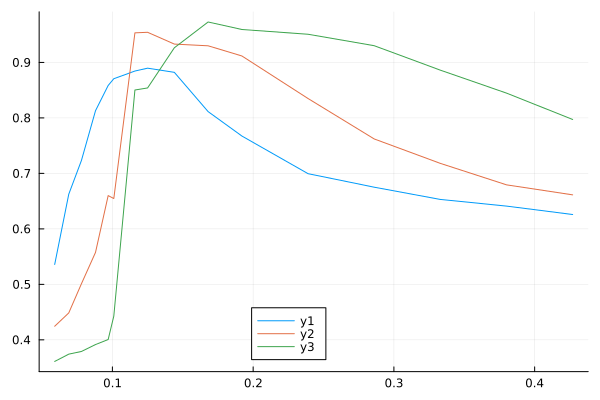

In [2]:
using Plots
plot(BC[2:17,1,1], [BC[2:17,1,2] BC[2:17,2,2] BC[2:17,3,2]],legend=:bottom)

In [8]:
open("BC_strains.dat", "w") do io
            writedlm(io, ["Sir4conc" "wt" "rap1" "sir1" "H3K79M"])
           writedlm(io, [BC[2:17,1,1] BC[2:17,:,2]])
       end